In [1]:
import numpy as np
from scipy import fft
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

"""
Dimensions: 
  [L] = 2000km
  [T] = 86400s
  So beta = 2e-12 (ms)^-1 is equal to 0.3456 L^-1*T^-1
  & length_scale L = 3/200 L

"""

R = 10 #spectral radius need to calculate this such that certain number of harmonics present...
N = 41
k,l = np.meshgrid(np.linspace(-R,R,N),np.linspace(-R,R,N)) #grid of wavevectors

#Frequency for each Rossby wave given by dispersion relation
L = 3/200 #units L
beta = 0.3456 #units L^-1 T^-1
def omega(k, l):
    return -beta * k / (k**2 + l**2 + L**-2)

#Various grids of values corresponding to each wavevector
omega_vals = omega(k,l)
periods = 2*np.pi * 1/omega_vals
phi = np.random.uniform(0,2*np.pi,size = (N,N)) #initial phase grid, will update this at certain time intervals to shift phase 

<ipython-input-1-58cd1ae12d76>:28: RuntimeWarning: divide by zero encountered in divide
  periods = 2*np.pi * 1/omega_vals


<IPython.core.display.Javascript object>


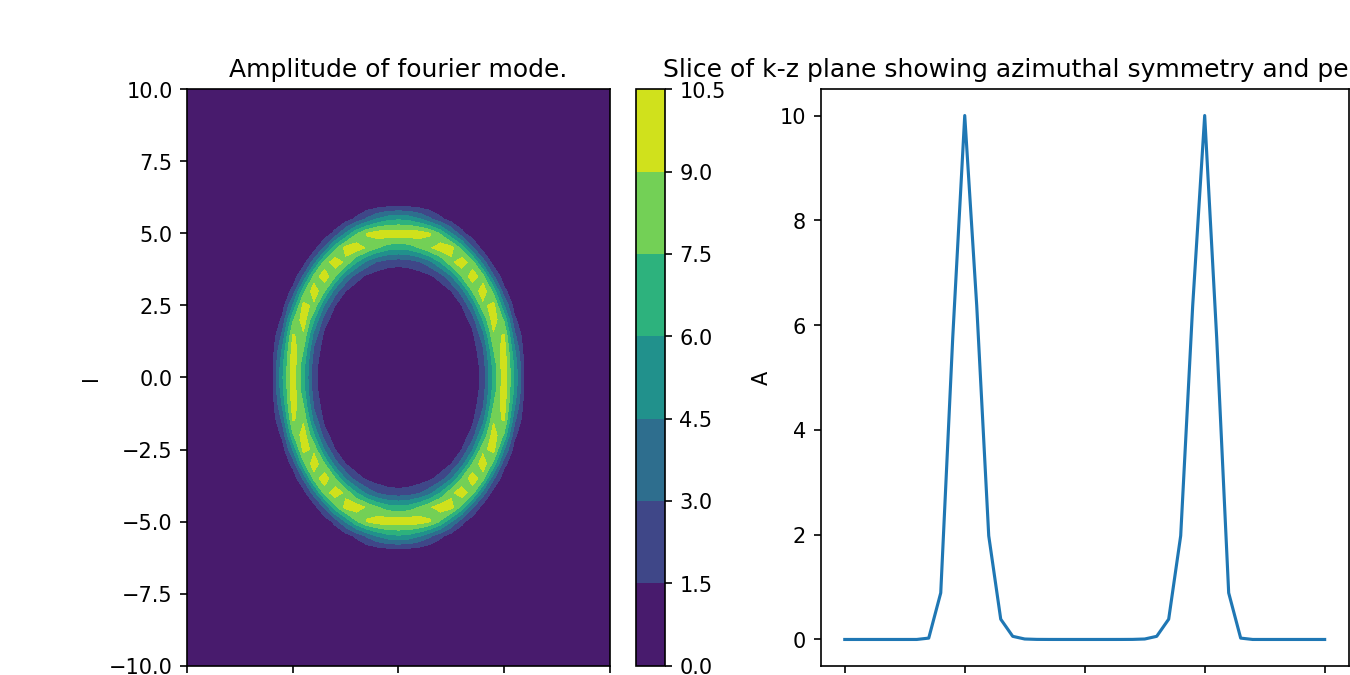

In [2]:
"""
Amplitude function
Propose the function A(k,l) = H * exp(-(k^2 + l^2 - P^2)^2 / 2P^2)
This is is azimuthally symmetric with peak amplitude achieved at radius P, of height H

"""

P = 5 #radius of peak
H = 10 #height of peak (max amplitude)

def A(k,l):
    return H * np.exp(-(k**2+l**2-P**2)**2/(2*P**2))

A_vals = A(k,l)

#Visualise it
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

im = ax1.contourf(k,l,A_vals)
plt.colorbar(im,ax=ax1)
ax1.set_xlabel('k')
ax1.set_ylabel('l')
ax1.set_title('Amplitude of fourier mode.')
#Illustrative slice from k-z plane
ax2.plot(k[(N-1)//2], A_vals[:,(N-1)//2])
ax2.set_xlabel('k')
ax2.set_ylabel('A')
ax2.set_title('Slice of k-z plane showing azimuthal symmetry and peak locations.')

plt.show()

<IPython.core.display.Javascript object>


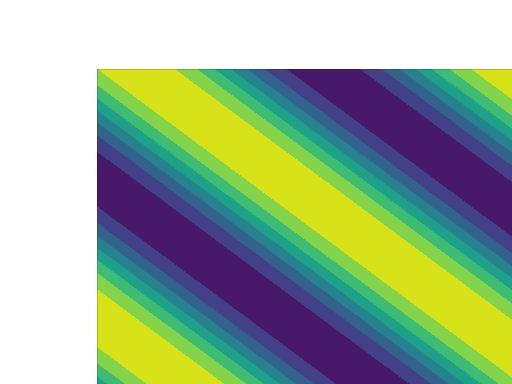

In [9]:
#Single Rossby wave
k,l = 5,5
a = A(k,l)
p = np.random.uniform(0,2*np.pi)
x,y = np.meshgrid(np.linspace(-1,1,100),np.linspace(-1,1,100))
t_vals = np.linspace(0,10000,100) #30 days

f = np.empty((len(t_vals),100,100))

for i,t in enumerate(t_vals):
    f[i] = np.real(a * np.exp(1j*(k*x+l*y - omega(k,l)*t + p)))

fig, ax = plt.subplots()
def animate(i):
    ax.clear()
    ax.contourf(x,y,f[i])

ani = animation.FuncAnimation(fig, animate, len(t_vals), interval=1, blit=False,repeat=True)
ani